In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [19]:
# read all the data
ccba = pd.read_csv('public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('public_train_x_remit1_full_hashed.csv')

#use train answer and public answer
public_x_alert_date = pd.read_csv('public_x_alert_date.csv')
train_x_alert_date = pd.read_csv('train_x_alert_date.csv')
alert_date = pd.concat([public_x_alert_date,train_x_alert_date])
# print(alert_date.shape)

public_y_answer = pd.read_csv('public_answer.csv')
train_y_answer = pd.read_csv('train_y_answer.csv')
y_answer = pd.concat([public_y_answer,train_y_answer])

## 觀察樣本 0 與 1 個數

In [20]:
print(train_y_answer)
print(train_y_answer['sar_flag'].value_counts())

       alert_key  sar_flag
0         171189         0
1         171202         0
2         171599         0
3         171737         0
4         171142         0
...          ...       ...
23901     352132         0
23902     352125         0
23903     352080         0
23904     352075         0
23905     351927         0

[23906 rows x 2 columns]
0    23672
1      234
Name: sar_flag, dtype: int64


## 資料平衡

In [21]:
# sample 0 and 1 to balance way 1
# temp = train_y_answer.loc[train_y_answer['sar_flag'] == 0]
# temp2 = train_y_answer.loc[train_y_answer['sar_flag'] == 1]

# temp3 = pd.concat([temp2]*100,ignore_index=True)

# train_y_answer_resampled = pd.concat([temp,temp3])
# print(train_y_answer_resampled['sar_flag'].value_counts())
# print(train_y_answer_resampled)

In [22]:
# sample 0 and 1 to balance way 2
from imblearn.over_sampling import RandomOverSampler


temp = train_y_answer['alert_key'].array.reshape(-1, 1)
temp2 = train_y_answer['sar_flag'].array.reshape(-1, 1)
# print(temp)
# print(temp2)

# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
temp_ros, temp2_ros= ros.fit_resample(temp, temp2)
# Check the number of records after over sampling
print(temp_ros)
print(temp2_ros)

train_y_answer_resampled = pd.DataFrame({
    'alert_key':temp_ros.flatten(),
    'sar_flag':temp2_ros.flatten()
})
print(train_y_answer_resampled)
print(train_y_answer_resampled['sar_flag'].value_counts())

[[171189]
 [171202]
 [171599]
 ...
 [194998]
 [268765]
 [184729]]
[0 0 0 ... 1 1 1]
       alert_key  sar_flag
0         171189         0
1         171202         0
2         171599         0
3         171737         0
4         171142         0
...          ...       ...
47339     230638         1
47340     185217         1
47341     194998         1
47342     268765         1
47343     184729         1

[47344 rows x 2 columns]
0    23672
1    23672
Name: sar_flag, dtype: int64


In [23]:
def check_csv(df):
    print(df.head(),'\n',"shape = :",df.shape)
    print(df.isnull().sum())

In [24]:
df = pd.merge(alert_date,train_y_answer_resampled)

check_csv(df)

   alert_key  date  sar_flag
0     171189     0         0
1     171202     0         0
2     171599     0         0
3     171737     0         0
4     171142     0         0 
 shape = : (47344, 3)
alert_key    0
date         0
sar_flag     0
dtype: int64


## check every csv 

In [25]:
check_csv(ccba)

                                             cust_id  lupay  byymm     cycam  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0      0  152628.0   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     30  152628.0   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     61  152628.0   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     91  152628.0   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0    122  152628.0   

   usgam  clamt  csamt  inamt  cucsm  cucah  
0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0   
 shape = : (59075, 10)
cust_id    0
lupay      0
byymm      0
cycam      0
usgam      0
clamt      0
csamt      0
inamt      0
cucsm      0
cucah      0
dtype: int64


In [26]:
temp = ccba.drop(['usgam','clamt','csamt','cucah'],axis=1)
ccba = temp
check_csv(ccba)

                                             cust_id  lupay  byymm     cycam  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0      0  152628.0   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     30  152628.0   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     61  152628.0   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     91  152628.0   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0    122  152628.0   

   inamt  cucsm  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0   
 shape = : (59075, 6)
cust_id    0
lupay      0
byymm      0
cycam      0
inamt      0
cucsm      0
dtype: int64


In [27]:
check_csv(cdtx)

                                             cust_id  date  country  cur_type  \
0  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...     1      130        47   
1  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    10      130        47   
2  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    10      130        47   
3  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    13      130        47   
4  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    15      130        47   

      amt  
0  2312.0  
1   808.0  
2  7099.0  
3   306.0  
4   255.0   
 shape = : (1043014, 5)
cust_id     0
date        0
country     0
cur_type    0
amt         0
dtype: int64


In [28]:
# temp = cdtx.drop(['country','cur_type'],axis=1).groupby(['cust_id','date'],as_index=False)['amt'].sum()
temp = cdtx.groupby(['cust_id','date','country','cur_type'],as_index=False).sum()
cdtx = temp
check_csv(cdtx)

                                             cust_id  date  country  cur_type  \
0  0015cc01f553512007705edf855baa16f1b57a16fb107e...    21      130        47   
1  0015cc01f553512007705edf855baa16f1b57a16fb107e...    52      130        47   
2  0015cc01f553512007705edf855baa16f1b57a16fb107e...    56      130        47   
3  0015cc01f553512007705edf855baa16f1b57a16fb107e...    59      130        47   
4  0015cc01f553512007705edf855baa16f1b57a16fb107e...    62      130        47   

       amt  
0  13428.0  
1    202.0  
2   3624.0  
3    175.0  
4    128.0   
 shape = : (455436, 5)
cust_id     0
date        0
country     0
cur_type    0
amt         0
dtype: int64


In [29]:
check_csv(custinfo)

   alert_key                                            cust_id  risk_rank  \
0     352249  82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...          1   
1     352253  b212d14cb35676926682b2cf849e295d948888f556c07e...          1   
2     352254  e5b0002791c7852644a2730abeaa893cdf14a072ef7812...          1   
3     352280  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...          3   
4     352282  0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...          1   

   occupation_code  total_asset  AGE  
0             19.0    1465816.0    7  
1              2.0      98177.0    2  
2             19.0    2052922.0    7  
3             15.0     201906.0    5  
4             12.0       7450.0    5   
 shape = : (25751, 6)
alert_key            0
cust_id              0
risk_rank            0
occupation_code    116
total_asset          0
AGE                  0
dtype: int64


In [30]:
temp = custinfo.drop(['occupation_code','AGE'],axis=1)
custinfo = temp
check_csv(custinfo)

   alert_key                                            cust_id  risk_rank  \
0     352249  82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...          1   
1     352253  b212d14cb35676926682b2cf849e295d948888f556c07e...          1   
2     352254  e5b0002791c7852644a2730abeaa893cdf14a072ef7812...          1   
3     352280  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...          3   
4     352282  0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...          1   

   total_asset  
0    1465816.0  
1      98177.0  
2    2052922.0  
3     201906.0  
4       7450.0   
 shape = : (25751, 4)
alert_key      0
cust_id        0
risk_rank      0
total_asset    0
dtype: int64


In [31]:
check_csv(dp)

                                             cust_id debit_credit  tx_date  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       36   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       42   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       39   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       49   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       70   

   tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  fiscTxId  \
0       18        2   68265.0         1.0               16       NaN   
1       17        2  932058.0         1.0               16       NaN   
2       18        2    6089.0         1.0               16       NaN   
3       15        2  776715.0         1.0               16       NaN   
4       19        2   61630.0         1.0               16       NaN   

   txbranch  cross_bank  ATM  
0       NaN           0    0  
1       NaN           0    0  
2    

In [32]:
# too many Nan in 'fiscTxId' and 'txbranch' so we drop them
temp = dp.drop(['tx_time','exchg_rate','fiscTxId','txbranch'],axis=1)
temp.dropna(axis='index',inplace=True)
# then we drop columns
# 當天交易總額
temp.groupby(['cust_id','tx_date'])['tx_amt'].sum()
dp = temp
check_csv(dp)

                                             cust_id debit_credit  tx_date  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       36   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       42   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       39   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       49   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       70   

   tx_type    tx_amt  info_asset_code  cross_bank  ATM  
0        2   68265.0               16           0    0  
1        2  932058.0               16           0    0  
2        2    6089.0               16           0    0  
3        2  776715.0               16           0    0  
4        2   61630.0               16           0    0   
 shape = : (1947803, 8)
cust_id            0
debit_credit       0
tx_date            0
tx_type            0
tx_amt             0
info_asset_code    0
cross_bank         0
ATM              

In [33]:
check_csv(remit)

                                             cust_id  trans_date  trans_no  \
0  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         148         0   
1  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         165         0   
2  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         231         0   
3  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         291         0   
4  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         389         0   

   trade_amount_usd  
0          100528.0  
1          100528.0  
2           89479.0  
3          100528.0  
4           30158.0   
 shape = : (17167, 4)
cust_id             0
trans_date          0
trans_no            0
trade_amount_usd    0
dtype: int64


In [34]:
# temp = remit.drop(['trans_no'],axis=1)
temp = remit
#交易總額
temp = temp.groupby(['cust_id','trans_date'],as_index=False)['trade_amount_usd'].sum()
remit = temp
check_csv(remit)

                                             cust_id  trans_date  \
0  002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...         153   
1  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         223   
2  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         312   
3  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         328   
4  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         356   

   trade_amount_usd  
0          343647.0  
1            6071.0  
2           60024.0  
3          531413.0  
4            2109.0   
 shape = : (15413, 3)
cust_id             0
trans_date          0
trade_amount_usd    0
dtype: int64


## Merge csv

In [35]:
def merge_csv(df):
    # merge custinfo to get alert_key with custid and get more information
    df = pd.merge(df,custinfo,on='alert_key',how='left')
    # print(df.head(),'\n',df.shape)
    # print(df.isnull().sum())

    # merge ccba on cust_id and date
    temp = pd.merge(df,ccba.rename(columns={'byymm':'date'}),on=['cust_id','date'],how='left')
    # print(temp.head(),'\n',temp.shape)
    # print(temp.isnull().sum())
    df = temp

    # merge cdtx on cust_id and date
    temp = pd.merge(df,cdtx,on=['cust_id','date'],how='left')
    df = temp

    # merge dp on cust_id and date
    temp = pd.merge(df,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')
    #turn 'debit_credit' into dummy variables
    temp = pd.get_dummies(temp, columns=['debit_credit'])
    df = temp

    # merge remit on cust_id and date
    temp = pd.merge(df,remit.rename(columns={'trans_date':'date'}),on=['cust_id','date'],how='left')
    df = temp

    # fill all Nan
    df.fillna(0,inplace=True)
    # print(df.head(),'\n',df.shape)
    # print(df.isnull().sum())
    
    return df

df = merge_csv(df)
check_csv(df)

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171189     0         0   
2     171189     0         0   
3     171202     0         0   
4     171202     0         0   

                                             cust_id  risk_rank  total_asset  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1     375576.0   
1  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1     375576.0   
2  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1     375576.0   
3  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3    2717416.0   
4  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3    2717416.0   

     lupay     cycam  inamt     cucsm  ...  cur_type    amt  tx_type   tx_amt  \
0  85428.0  301224.0    0.0  151434.0  ...      47.0  673.0      2.0    309.0   
1  85428.0  301224.0    0.0  151434.0  ...      47.0  673.0      2.0   1020.0   
2  85428.0  301224.0    0.0  151434.0  ...      47.0  673.0      2.0    186.0   
3 

## 檢查是否保留住所有alert_key

In [36]:
print("shape of 'df':",df.shape)
print("shape of 'df.groupby('alert_key').first()':",df.groupby('alert_key').first().shape)

shape of 'df': (480302, 21)
shape of 'df.groupby('alert_key').first()': (23906, 20)


In [37]:
# drop 'cust_id' and 'alert_key'
X_ak = df['alert_key']
df.drop(['cust_id','alert_key'],axis=1,inplace=True)

In [38]:
# train test split
X = df.drop(['sar_flag'], axis=1)
Y = df['sar_flag']

from sklearn import preprocessing
#Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
X=minmax_scale.fit_transform(X)

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.05, random_state=42)

# X_train,Y_train = SMOTE(random_state=42).fit_resample(X_train,Y_train)

## Print Correlation Matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

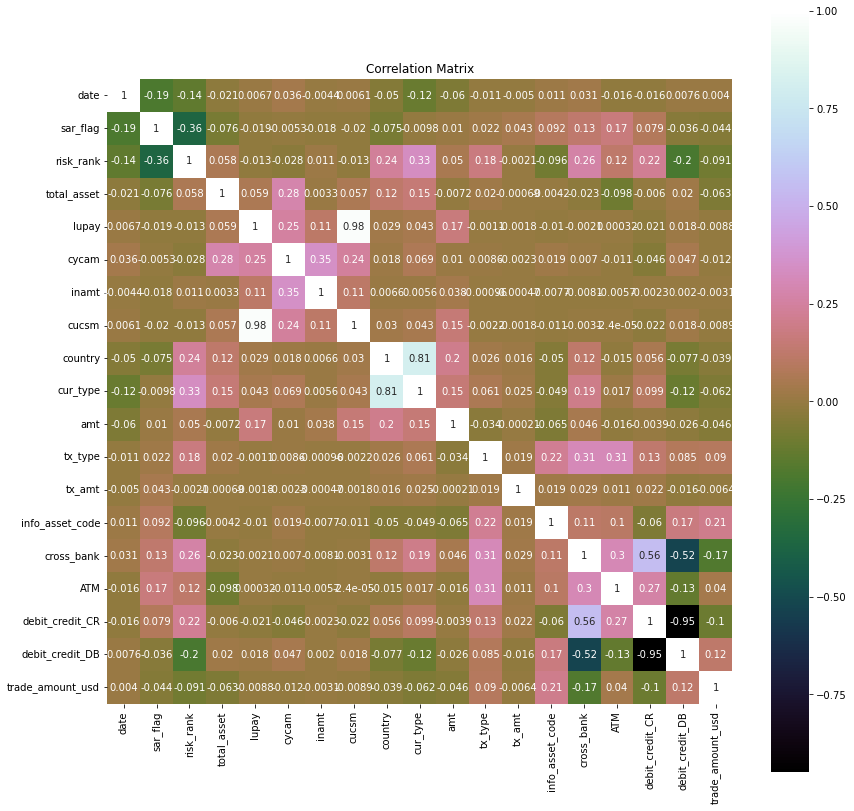

In [41]:
correlation = df.corr()
plt.figure(figsize=(13,13))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [391]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

input_dim = X_train.shape[1]
batch_size = int(X_train.shape[0] / 500)
epochs = 100
train = 1
load = 0
weight_path = 'fourth_try_weights_best.hdf5'

model = Sequential()
model.add(Dense(input_dim=input_dim,units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
# model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='Adam',loss='MSE',metrics=['accuracy'])


if load == 1:
    model.load_weights(weight_path)

if train == 1:
    # checkpoint
    checkpoint = ModelCheckpoint(weight_path, monitor='loss', verbose=1, save_best_only=True,mode='min')
    callbacks_list = [checkpoint]
    #Train model
    # model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_split=0,callbacks=callbacks_list)
    model.fit(X,Y,epochs=epochs,batch_size=batch_size,validation_split=0,callbacks=callbacks_list)
else:
    model.load_weights(weight_path)

Epoch 1/100
521/527 [============================>.] - ETA: 0s - loss: 0.1441 - accuracy: 0.8056
Epoch 1: loss improved from inf to 0.14374, saving model to fourth_try_weights_best.hdf5
527/527 [==============================] - 1s 2ms/step - loss: 0.1437 - accuracy: 0.8062
Epoch 2/100
497/527 [===========================>..] - ETA: 0s - loss: 0.1051 - accuracy: 0.8679
Epoch 2: loss improved from 0.14374 to 0.10463, saving model to fourth_try_weights_best.hdf5
527/527 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.8683
Epoch 3/100
519/527 [============================>.] - ETA: 0s - loss: 0.0908 - accuracy: 0.8868
Epoch 3: loss improved from 0.10463 to 0.09071, saving model to fourth_try_weights_best.hdf5
527/527 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.8869
Epoch 4/100
516/527 [============================>.] - ETA: 0s - loss: 0.0837 - accuracy: 0.8960
Epoch 4: loss improved from 0.09071 to 0.08364, saving model to fourth

In [333]:
model.load_weights(weight_path)

In [342]:
from sklearn import metrics

def print_acc(expected,predicted):
    print(metrics.classification_report(expected,predicted))
    print(metrics.confusion_matrix(expected, predicted))
    accuracy = accuracy_score(expected, predicted)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    # print("Average = macro")
    print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
    print('recall:',metrics.recall_score(expected, predicted,average='macro'))
    print('F1-score:',metrics.f1_score(expected, predicted,average='macro'))


predicted = model.predict(X_valid).round()
print_acc(Y_valid,predicted)

751/751 [==============================] - 1s 697us/step
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8959
           1       0.95      0.98      0.97     15057

    accuracy                           0.96     24016
   macro avg       0.96      0.95      0.95     24016
weighted avg       0.96      0.96      0.96     24016

[[ 8197   762]
 [  272 14785]]
Accuracy: 95.69%
precision: 0.9594350978357665
recall: 0.9484405884865252
F1-score: 0.9534418763808703


### 提交符合範例的csv檔案

In [343]:
df2 = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)

df2 = pd.merge(df2,alert_date,on='alert_key',how='left')

print(df2.head(),'\n',df2.shape)
print(df2.isnull().sum())

   alert_key   date
0     357307  370.0
1     376329    NaN
2     373644    NaN
3     357668  370.0
4     354443  372.0 
 (3850, 2)
alert_key       0
date         2005
dtype: int64


In [344]:
df2 = merge_csv(df2)

# save alert key
df2_ak = df2['alert_key']

## 檢查是否保留所有alert_key

In [337]:
print("shape of 'df2.groupby('alert_key').first()':",df2.groupby('alert_key').first().shape)

shape of 'df2.groupby('alert_key').first()': (3850, 19)


In [345]:
# drop 'cust_id' and 'alert_key'
df2.drop(['cust_id','alert_key'],axis=1,inplace=True)

#Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
df2=minmax_scale.fit_transform(df2)

In [348]:
ans_y = model.predict(df2).flatten()

df3 = pd.DataFrame({
    "probability":ans_y
})
print(ans_y.shape)

final = pd.concat([df2_ak,df3],axis=1)
print(final.shape)

final = final.groupby('alert_key',as_index=False).max()
print(final.shape)

# 機率由大到小
final.sort_values(inplace=True,by=['probability'],ascending=False)
print(final)

final.to_csv('submission_fourth_try.csv', index=False)

504/504 [==============================] - 0s 703us/step
(16115,)
(16115, 2)
(3850, 2)
      alert_key  probability
462      355761     1.000000
344      355090     1.000000
793      357788     0.999997
1310     361145     0.999985
807      357870     0.999920
...         ...          ...
899      358431     0.000000
36       352501     0.000000
34       352495     0.000000
61       352705     0.000000
56       352693     0.000000

[3850 rows x 2 columns]


In [ ]:
# df4 = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)
# print(df4)

In [ ]:
# temp = pd.merge(df4,final,on='alert_key',how='left').fillna(0)
# # 機率由大到小
# temp.sort_values(inplace=True,by=['probability'],ascending=False)
# temp.to_csv('submission_third_try.csv', index=False)
# print(temp)